# CarDekho.com Dataset 

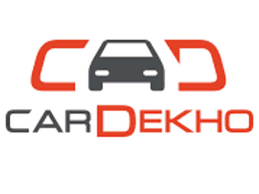

### This dataset contains information about used cars listed on www.cardekho.com
### It has been taken from https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho?select=car+data.csv

## Price prediction of the car to be sold

#### Importing the necessary libraries

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.axis import Axis
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

#### Reading the data from the csv file 
##### Note: Here we have 2 different datasets, df_cardekho is the main dataset through which we will predict the car prices. And the df_cardetails provide the in-depth details about the car being sold.

In [ ]:
df_cardekho = pd.read_csv("../input/vehicle-dataset-from-cardekho/CAR DETAILS FROM CAR DEKHO.csv")

In [ ]:
df_cardetails = pd.read_csv("../input/vehicle-dataset-from-cardekho/Car details v3.csv")

In [ ]:
# Define Utiliy Functions
def data_insights_report(data=pd.DataFrame()):
    report = pd.DataFrame()
    report['Columns'] = data.columns
    report['Data_Types'] = data.dtypes.values
    report['Unique_Count'] = data.nunique().values
    report['NAN_Count'] = data.isna().sum().values

    tempdf = data.describe().apply(lambda x: round(x,2), axis=1).T
    pd.merge(report,tempdf.reset_index().rename(columns={'index':'Columns'}), on='Columns')

    return report.join(tempdf, on='Columns')

## EDA on 'df_carkdekho' Dataframe

In [ ]:
df_cardekho.head()

In [ ]:
df_cardekho.shape

**Checking for Duplicate rows.**

In [ ]:
duplicate = df_cardekho[df_cardekho.duplicated()] 
print("Duplicate Rows :") 
duplicate 

In [ ]:
df_cardekho.drop_duplicates(inplace=True)

In [ ]:
df_cardekho.shape

We have dropped the 763 duplicate rows.

**A heatmap to check the null values**

In [ ]:
sns.heatmap(df_cardekho.isnull())
plt.show()

In [ ]:
# Plotting the Pearson Correlation of Features

def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(6,4))
    colormap = sns.diverging_palette(240, 20, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = 'viridis',
        square=True, 
        cbar_kws={'shrink':.8 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=20)
    plt.savefig('Heatmap.png')
    
    correlation = df.corr().unstack().sort_values(kind='quicksort')
    print('Highly Correlated Variables')
    return correlation[((correlation>=0.75) | (correlation<=-0.75)) & (correlation!=1)]

correlation_heatmap(df_cardekho)

**Question : Why are there only 3 parameters on the Correlation Heatmap?**

### UNIVARIATE ANALYSIS 

In [ ]:
data_insights_report(df_cardekho)

**>> We do not have any null values in our data from df_cardekho**

**>> And all the data types are as per their attributes.**

In [ ]:
df_cardekho['year'].unique()

**>> We have data ranging from years 1992 to 2020**

In [ ]:
df_cardekho['seller_type'].unique()

In [ ]:
sns.countplot(data=df_cardekho,x="fuel")
plt.title('Number of Cars grouped by fuel type')
plt.ylabel('Number of Cars')
plt.xlabel('Fuel Types')
plt.show();

**>> Most cars to be sold are either petrol or diesel.**

In [ ]:
sns.distplot(df_cardekho.selling_price, kde=False)
plt.title('Selling price Distribution of cars')
plt.show();

**>> Here we can observe that majority of the cars are sold in the price range of 2-10 Lakh.**

### BIVARIATE ANALYSIS

In [ ]:
sns.boxplot(x="owner", y="km_driven", data=df_cardekho)

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='seller_type',hue='transmission',data=df_cardekho)

**>> We can see that the cars being sold by an Individual with Manual transmission is highest**

In [ ]:
sns.catplot(y="transmission", hue="year", kind="count",
            data=df_cardekho)


**>> Here we can observe that most of the Automatic transmission cars have a Manufacturer Date after 2008-2009 as there were very few automatic cars at that time in India.**

 **Checking how the seller type influences the selling type :**

In [ ]:
fig, (axis1,axis2) = plt.subplots(1, 2, figsize = (20,5))
sns.countplot(x="seller_type", data=df_cardekho, ax=axis1)
sns.barplot(x="seller_type", y="selling_price",data=df_cardekho, ax=axis2 )

**>> Number of Indiviual sellers is the highest but Trustmark dealers are selling the cars for the highest price**

**Effect of field "owner" to the selling price**

In [ ]:
fig, (axis1,axis2)=plt.subplots(1,2,figsize=(20,5))
sns.countplot(x="owner",data=df_cardekho,ax=axis1)
sns.barplot(x="owner",y="selling_price",data=df_cardekho,ax=axis2)

**>> The number of respective owners and the selling price at which they are selling their graphs has a similar graph except the Test Drive Car**

**How the transmission type affects selling price**

In [ ]:
fig, (axis1,axis2)=plt.subplots(1,2,figsize=(20,5))
sns.countplot(x="transmission",data=df_cardekho,ax=axis1)
sns.barplot(x="transmission",y="selling_price",data=df_cardekho,ax=axis2)

**>> Number of manual cars being sold is more than automatic, but automatic cars sells at a higher price**

In [ ]:
sns.scatterplot(data=df_cardekho,x="km_driven",y="selling_price")

**>> Most of the cars are selling at a price less than Rs 20 lakh and the km on them are less than 3 lakh km.**

**>> But we can see some outliers here where the price of the car can be as high as Rs 80lakh but cannot be driven for more than 8lakh km**

**Cars which are less driven sell for a higher price**

In [ ]:
df_cardekho["Age"] = 2020-df_cardekho["year"]
df_cardekho.drop('year',axis=1,inplace=True)
sns.lineplot(data=df_cardekho,x="Age",y="selling_price")

**We created a new feature called 'Age' using the 'year' of the car and appended it to the dataframe**

**We can now drop the Year column from the dataframe.**

**>> Newer cars sell for higher prices**

In [ ]:
sns.barplot(data=df_cardekho,x="fuel",y="selling_price")

**>> Diesel cars have the most selling price folowed by petrol.**

### MULTIVARIATE ANALYSIS

In [ ]:
df_seller_owner = df_cardekho.groupby(by=["seller_type","owner","transmission"])
df_seller_owner.count().sort_values(by="selling_price", ascending=False).plot(kind="bar", y="selling_price")

##### The above graph gives us an insight into how "seller_type","owner","transmission" as a group influence the "selling price" 

In [ ]:
sns.catplot(x="fuel", y="km_driven",
                hue="owner", col="transmission",
                data=df_cardekho, kind="box",
                height=7, aspect=.8);

**Here we can see that as the ownership of the car is getting passed on, the km count is increasing.**

## EDA on 'df_cardetails' Dataframe

In [ ]:
df_cardetails.head()

In [ ]:
df_cardetails.info()

In [ ]:
df_cardetails.isnull().sum()

In [ ]:
df_cardetails.shape

In [ ]:
duplicate = df_cardetails[df_cardetails.duplicated()] 
print("Duplicate Rows :") 
duplicate 

In [ ]:
df_cardetails.drop_duplicates(inplace=True)

**We have 1202 rows with the same values which won't add value as they are duplicates.**

In [ ]:
df_cardetails.shape

**We have dropped the torque column as it has multiple values which need to be separated in order to make any inferences. This can be achieved using Regex.**

In [ ]:
df_cardetails.drop(['torque'],axis = 1,inplace=True)

### Removing the extra characters in mileage, engine, max_power and obtaining only the name of manufacturer 

In [ ]:
z = lambda x: float(str(x).split(' ')[0])
df_cardetails['mileage'] = df_cardetails['mileage'].apply(z)

In [ ]:
z = lambda x: float(str(x).split(' ')[0])
df_cardetails['engine'] = df_cardetails['engine'].apply(z)

In [ ]:
a= df_cardetails['max_power'].str.replace('bhp',' ')
df_cardetails['max_power'] = a

In [ ]:
z = lambda x: str(str(x).split(' ')[0])
df_cardetails['name'] = df_cardetails['name'].apply(z)

In [ ]:
df_cardetails.head()

In [ ]:
df_cardetails.shape

In [ ]:
data_insights_report(df_cardetails)

In [ ]:
df_cardetails[df_cardetails['seats']==5].value_counts().sum()

**Since almost 70% cars are 5-seater, so we impute the mean values of the cars whose data is available for the cars whose data is unavailable.**

### Null Value imputations with mean

In [ ]:
most_frequent_value = df_cardetails['mileage'].mean()
df_cardetails['mileage'] = df_cardetails['mileage'].fillna(most_frequent_value)

In [ ]:
most_frequent_value = df_cardetails['engine'].mean()
df_cardetails['engine'] = df_cardetails['engine'].fillna(most_frequent_value)

In [ ]:
most_frequent_value = round(df_cardetails['seats'].mean())
df_cardetails['seats'] = df_cardetails['seats'].fillna(most_frequent_value)

In [ ]:
df_cardetails.info()

**Here we can see that only max_power has the Dtype as object as there is some space/unknown character in the data.So we cannot change its data type until the data is cleaned,hence we drop this column.**

In [ ]:
df_cardetails.drop(['max_power'],axis = 1,inplace=True)

### Some visualizations 

In [ ]:
fig, (axis1,axis2) = plt.subplots(1, 2, figsize = (18,5))
sns.countplot(x = 'seats', data = df_cardetails, ax = axis1)
sns.lineplot(x = 'seats', y = 'selling_price', data = df_cardetails, ax = axis2);

**Here we can see that most of the cars have 5 seats. But the maxiumum selling prices are for cars with 7 seats as most likely they are SUV's/MUV's which are generally higher in cost.**

In [ ]:
fig, (axis1,axis2) = plt.subplots(1, 2, figsize = (18,5))
sns.scatterplot(x = 'engine', y = 'selling_price', data = df_cardetails,ax = axis1);
plt.title('Selling Price vs Engine Capacity');
sns.scatterplot(x = 'mileage', y = 'selling_price', data = df_cardetails,ax = axis2);
plt.title('Selling Price vs Mileage of car');

**GRAPH 1: We can see that each segment of Engiine capacities have variable pricing which can be based on the make of the car.**

**GRAPH 2: A similar trend is observed for mileage in which for a car with similar mileage's the selling prices vary.**

In [ ]:
df_cardetails['name'].unique()

In [ ]:
df_cardetails['name'].value_counts()

In [ ]:
plt.figure(figsize=(20,5))
df_cardetails.name.value_counts().head(100).plot.bar()
plt.xlabel('Make')
plt.ylabel('Count of Cars')
plt.show()

**The top 5 manufacturers of cars being sold on CarDekho.com are Maruti Suzuki, Hyundai, Mahindra, Tata and Honda.**

In [ ]:
# The total revenue generated in selling a particular Make.
rev = pd.DataFrame(df_cardetails.groupby(['name'])['selling_price'].sum()).reset_index()
rev.columns = ['name','selling_price']
rev['percent'] = round(rev['selling_price']/(rev['selling_price'].sum())*100,2)
display (rev.sort_values(['selling_price'], ascending=0))

**Value wise %share of Maruti cars is about 23% of total, however volume wise it is 30%.**
**It clearly shows that average selling price of a Maruti car is lower as compared to other brands.**